# Projet de prédiction de la consommation de carburant au Canada (2000 - 2022)

# ===============================
# 🔍 Étape 1 : Compréhension du problème métier
# ===============================

"""
Objectif :
Analyser l'évolution de la consommation moyenne de carburant des véhicules au Canada sur la période 2000-2022, et prévoir la tendance pour les prochaines années.

Problématique :
Comment la consommation moyenne de carburant a-t-elle évolué au Canada, et peut-on anticiper son évolution future afin d'appuyer les stratégies écologiques et énergétiques ?
"""

# 📈 Étape 2 : Compréhension des données

In [3]:
import pandas as pd

# Charger les données
file_path = "Fuel_Consumption_2000-2022.csv"
df = pd.read_csv(file_path)

# Afficher les informations générales
print(df.info())
print(df.head())

# Vérification des années présentes
print("Années disponibles :", sorted(df['YEAR'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB
None
   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT    

# 🦜 Étape 3 : Préparation des données

In [5]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [6]:
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [7]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

Valeurs manquantes par colonne :
YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


count    22556.000000
mean        11.034341
std          2.910920
min          3.600000
25%          9.100000
50%         10.600000
75%         12.700000
max         26.100000
Name: COMB (L/100 km), dtype: float64


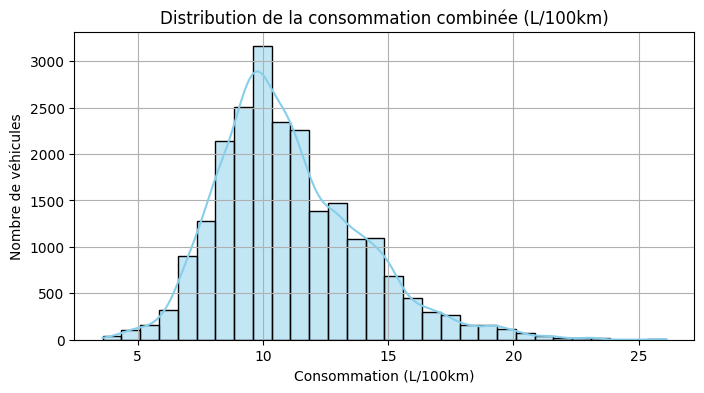

In [8]:
# Statistiques sur la consommation combinée
print(df["COMB (L/100 km)"].describe())

# Histogramme de la distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(df["COMB (L/100 km)"], bins=30, kde=True, color="skyblue")
plt.title("Distribution de la consommation combinée (L/100km)")
plt.xlabel("Consommation (L/100km)")
plt.ylabel("Nombre de véhicules")
plt.grid(True)
plt.show()

## Interprétation de la distribution de la consommation combinée (L/100km)

Le graphique présenté est un **histogramme** qui illustre la **fréquence** des différentes valeurs de **consommation combinée de carburant (en litres par 100 kilomètres)** pour l'ensemble des véhicules inclus dans le jeu de données sur la période 2000-2022.

**Observations clés :**

* **Asymétrie positive (à droite) :** La distribution n'est pas symétrique. On observe une concentration plus importante de véhicules avec une consommation de carburant relativement basse (autour de 10-11 L/100km), tandis qu'une **longue traîne s'étend vers des valeurs de consommation plus élevées**. Cela suggère que, bien que la majorité des véhicules soient relativement économes en carburant, une proportion non négligeable consomme beaucoup plus.

* **Pic de fréquence :** Le pic de l'histogramme indique la **plage de consommation la plus courante**, qui se situe approximativement entre **10 et 11 L/100km**. C'est la catégorie de consommation où l'on retrouve le plus grand nombre de véhicules dans l'ensemble des données.

* **Étendue de la consommation :** La consommation combinée varie considérablement, allant d'un minimum d'environ **3.5 L/100km** à un maximum dépassant **25 L/100km**. Cette large plage souligne la **diversité en termes d'efficacité énergétique** au sein du parc automobile canadien sur la période étudiée.

* **Décroissance de la fréquence :** À mesure que la consommation de carburant augmente au-delà de la plage la plus fréquente, le **nombre de véhicules correspondant diminue progressivement**. Cela indique qu'il y a de moins en moins de véhicules extrêmement gourmands en carburant dans l'ensemble des données.

**Implications pour l'analyse des séries temporelles :**

Bien que ce graphique offre un aperçu global de la distribution de la consommation, il est crucial de se rappeler que notre objectif principal est d'analyser l'**évolution de la *moyenne* de cette consommation au fil du temps**. Cette distribution globale est un instantané agrégé sur toutes les années et tous les types de véhicules.

Pour notre analyse de séries temporelles, il sera pertinent d'examiner comment cette distribution (ou sa moyenne) a **évolué annuellement** afin de détecter des tendances significatives dans l'efficacité énergétique du parc automobile canadien. Des changements dans la forme, le centre ou l'étendue de cette distribution au fil des ans pourraient éclairer notre compréhension des facteurs influençant la consommation de carburant.

In [10]:
# a. Agrégation annuelle de la consommation moyenne
annual_df = df.groupby("YEAR")["COMB (L/100 km)"].mean().reset_index()
annual_df.columns = ["Year", "Avg_Fuel_Consumption"]
print(annual_df.head())

   Year  Avg_Fuel_Consumption
0  2000             11.301565
1  2001             11.203387
2  2002             11.597162
3  2003             11.470488
4  2004             11.550223


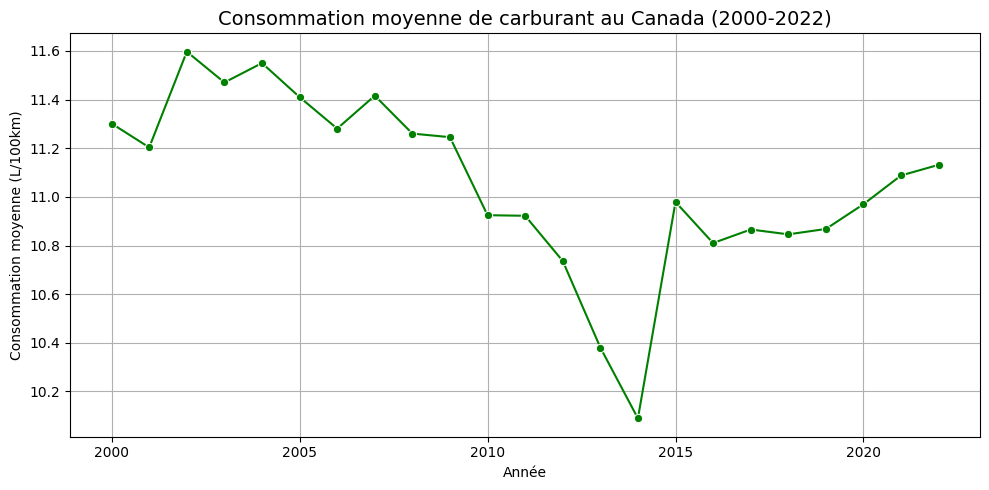

In [11]:
# Courbe de tendance annuelle
plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_df, x="Year", y="Avg_Fuel_Consumption", marker='o', color='green')
plt.title("Consommation moyenne de carburant au Canada (2000-2022)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Consommation moyenne (L/100km)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Interprétation de la consommation moyenne de carburant au Canada (2000-2022)

Ce graphique représente l'**évolution de la consommation moyenne de carburant (en litres par 100 kilomètres)** pour l'ensemble des véhicules au Canada sur la période allant de **2000 à 2022**. Chaque point sur la ligne verte correspond à la consommation moyenne calculée pour une année spécifique.

**Observations clés :**

* **Tendance générale à la baisse avec des fluctuations :** On observe une **tendance générale à la baisse** de la consommation moyenne de carburant sur l'ensemble de la période. Cependant, cette diminution n'est pas linéaire et est marquée par des **fluctuations annuelles**.

* **Période initiale (2000-2007) :** La consommation moyenne oscille autour de **11.2 à 11.6 L/100km** durant cette période, sans montrer de direction claire. On note même un pic en 2001 et 2003.

* **Diminution notable (2007-2014) :** À partir de 2007, une **diminution plus prononcée** de la consommation moyenne est visible, atteignant un point bas autour de **10.1 L/100km** en 2014. Cette période pourrait refléter l'impact de réglementations plus strictes en matière d'émissions, d'avancées technologiques dans l'efficacité des moteurs, ou de changements dans les préférences des consommateurs vers des véhicules plus économes.

* **Rebond et stabilisation (2014-2022) :** Après le creux de 2014, la consommation moyenne remonte légèrement et semble se **stabiliser autour de 10.8 à 11.1 L/100km** dans les dernières années de la période étudiée. Ce rebond pourrait être lié à divers facteurs, tels qu'une popularité croissante de véhicules plus gros (SUV, camions légers) ou un ralentissement du rythme des améliorations en matière d'efficacité.

**Implications pour la modélisation des séries temporelles :**

Ce graphique confirme que la consommation moyenne de carburant au Canada n'est pas une série temporelle stationnaire. On y observe une **tendance sous-jacente** (la diminution générale, bien que non linéaire) et potentiellement des **structures auto-corrélées** dans les fluctuations annuelles.

Pour la modélisation ARIMA, il sera nécessaire de **rendre cette série stationnaire** par des techniques telles que la différenciation, comme nous l'avons exploré précédemment. La présence de cette tendance claire suggère que la composante "tendance" identifiée par la décomposition saisonnière est significative.

Les fluctuations autour de cette tendance pourraient être modélisées par les composantes autorégressives (AR) et moyenne mobile (MA) du modèle ARIMA.

En résumé, ce graphique met en évidence une dynamique complexe dans l'évolution de la consommation moyenne de carburant au Canada, avec une tendance globale à la baisse interrompue par des périodes de stabilité et même une légère augmentation récente. Notre modèle de prédiction devra tenir compte de cette non-stationnarité et potentiellement capturer ces dynamiques pour fournir des prévisions fiables.

C:\Users\rhoum\AppData\Local\Temp\ipykernel_44380\4036548283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="YEAR", y="COMB (L/100 km)", palette="Set3")


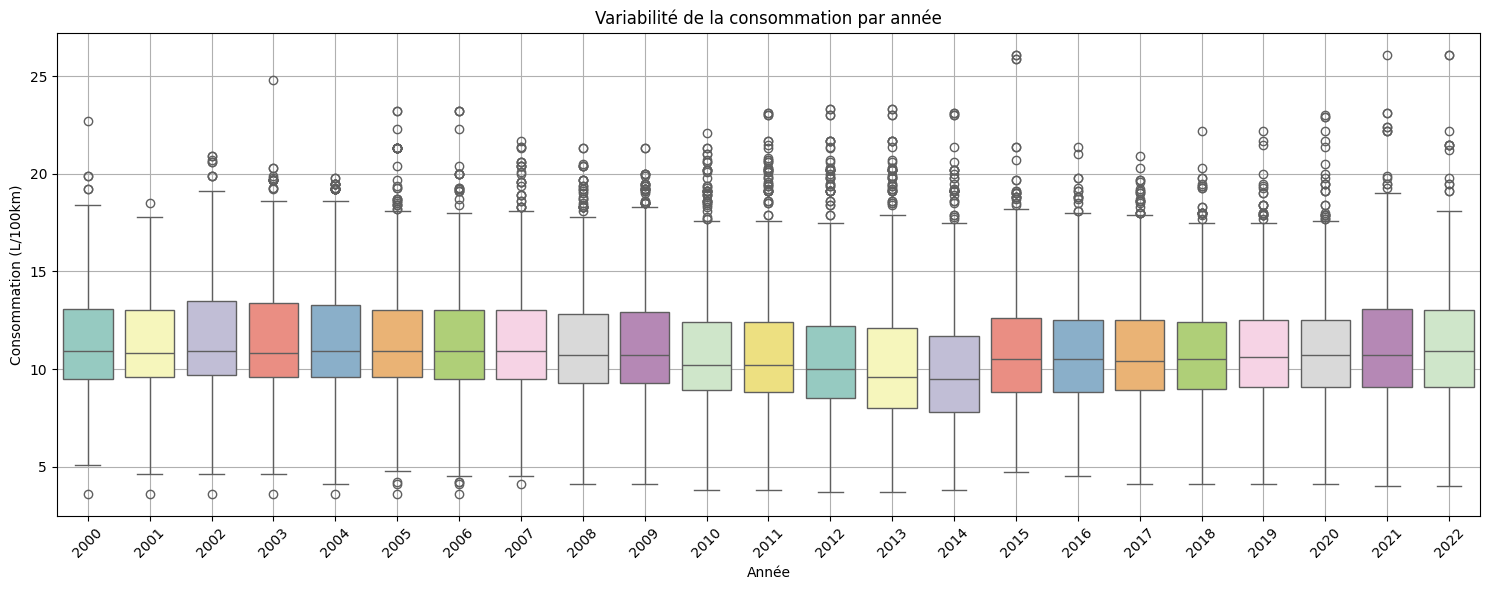

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="YEAR", y="COMB (L/100 km)", palette="Set3")
plt.title("Variabilité de la consommation par année")
plt.xlabel("Année")
plt.ylabel("Consommation (L/100km)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Interprétation de la variabilité de la consommation par année

Ce graphique présente une série de **boîtes à moustaches (boxplots)**, où chaque boîte représente la distribution de la **consommation combinée de carburant (en litres par 100 kilomètres)** pour l'ensemble des véhicules immatriculés au Canada pour une **année spécifique**, de 2000 à 2022.

**Observations clés :**

* **Position de la médiane (ligne au centre de la boîte) :** La ligne horizontale à l'intérieur de chaque boîte indique la **médiane** de la consommation pour cette année. On observe que la position de la médiane a une **tendance générale à la baisse** au fil du temps, ce qui concorde avec la diminution de la consommation moyenne que nous avons vue dans le graphique précédent. Cependant, cette baisse n'est pas uniforme.

* **Taille de la boîte (écart interquartile, IQR) :** La hauteur de chaque boîte représente l'**écart interquartile (IQR)**, qui contient 50% des données centrales (entre le 25ème et le 75ème percentile). Une boîte plus haute indique une plus grande **dispersion** ou variabilité dans la consommation de carburant pour cette année, tandis qu'une boîte plus courte suggère une variabilité plus faible. On remarque que la taille des boîtes semble relativement stable au fil des ans, bien qu'il y ait quelques variations.

* **Moustaches (lignes s'étendant des boîtes) :** Les moustaches s'étendent généralement jusqu'à 1.5 fois l'IQR au-dessus du troisième quartile et en dessous du premier quartile. Elles englobent la majorité des données. La longueur des moustaches donne une indication de l'**étendue de la distribution** et de la présence potentielle de valeurs aberrantes.

* **Points individuels (outliers) :** Les points situés au-delà des moustaches sont considérés comme des **valeurs aberrantes (outliers)**. Ils représentent des véhicules avec une consommation de carburant significativement plus élevée ou plus faible que la majorité des véhicules pour cette année. On observe un nombre conséquent de valeurs aberrantes, principalement du côté des consommations élevées, et ce pour toutes les années.

* **Comparaison inter-annuelle :** En comparant les boîtes d'une année à l'autre, on peut visualiser comment la distribution de la consommation a évolué. Par exemple, on peut noter que la médiane semble diminuer progressivement jusqu'aux années 2013-2014, puis se stabilise ou remonte légèrement. La variabilité (hauteur des boîtes) ne montre pas de tendance aussi marquée, suggérant que la dispersion de la consommation au sein de chaque année est restée relativement constante.

**Implications pour l'analyse des séries temporelles :**

Ce graphique est important car il nous montre que, bien que la *moyenne* de la consommation évolue, la **variabilité autour de cette moyenne** reste substantielle chaque année. Cela signifie que notre modèle de prédiction de la consommation *moyenne* devra être interprété en tenant compte de cette dispersion inhérente.

De plus, la présence constante d'outliers, principalement vers les consommations élevées, indique qu'il existe toujours une part de véhicules très gourmands en carburant dans le parc automobile canadien, et ce sur toute la période étudiée.

En résumé, ce graphique de boîtes à moustaches enrichit notre compréhension en montrant non seulement la tendance centrale de la consommation annuelle, mais aussi sa dispersion et la présence de valeurs extrêmes. Ces informations seront utiles pour évaluer la pertinence et les limites de notre modèle de prédiction de la consommation *moyenne*.

# 🔬 Étape 4 : Modélisation des séries temporelles

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [17]:
# Transformation en série temporelle
ts = annual_df.set_index("Year")["Avg_Fuel_Consumption"]
ts.head()

Year
2000    11.301565
2001    11.203387
2002    11.597162
2003    11.470488
2004    11.550223
Name: Avg_Fuel_Consumption, dtype: float64

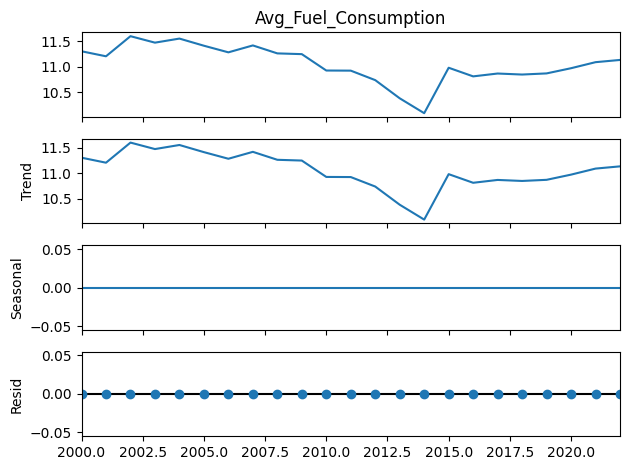

In [18]:
# a. Décomposition
decomp = seasonal_decompose(ts, model='additive', period=1)
decomp.plot()
plt.show()

## Interprétation de la décomposition saisonnière de la consommation moyenne

Ce graphique affiche la **décomposition saisonnière** de la série temporelle de la consommation moyenne de carburant au Canada (2000-2022). La décomposition a été réalisée en utilisant un modèle **additif** avec une **période de 1**, ce qui est approprié pour des données annuelles où l'on ne s'attend pas à une saisonnalité infra-annuelle. Le graphique est divisé en quatre sous-tracés :

1.  **Observed (Série observée) :** Le tracé supérieur montre la **série temporelle originale** de la consommation moyenne de carburant au fil des ans. C'est la même tendance que nous avons analysée précédemment, avec des fluctuations et une tendance générale à la baisse suivie d'une stabilisation/légère remontée.

2.  **Trend (Tendance) :** Le deuxième tracé illustre la **composante de tendance** de la série. Elle représente le mouvement à long terme de la consommation moyenne, lissée des fluctuations à court terme et de la saisonnalité (qui est absente ici avec une période de 1). On voit clairement la tendance à la baisse jusqu'à environ 2014, suivie d'une stabilisation et d'une légère remontée.

3.  **Seasonal (Saisonnier) :** Le troisième tracé affiche la **composante saisonnière**. Étant donné que notre période est de 1 (annuelle), et que nous n'attendons pas de cycle saisonnier au sein d'une année dans ces données agrégées, la composante saisonnière est représentée par une ligne **plate à zéro**. Cela confirme l'absence de saisonnalité dans nos données annuelles.

4.  **Resid (Résidu) :** Le tracé inférieur montre la **composante résiduelle** (ou bruit). Ce sont les fluctuations aléatoires ou irrégulières qui ne sont pas expliquées par la tendance ou la saisonnalité. Dans ce cas, les résidus sont de très faible amplitude et centrés autour de zéro, ce qui suggère que le modèle additif avec une tendance seule capture une grande partie de la variance de la série. Les petits points indiquent les valeurs résiduelles pour chaque année.

**Implications pour la modélisation des séries temporelles :**

* **Forte composante de tendance :** La décomposition met en évidence une **forte composante de tendance** dans la consommation moyenne de carburant. Notre modèle de prédiction devra absolument capturer cette dynamique pour faire des prévisions fiables.

* **Absence de saisonnalité :** Comme attendu pour des données annuelles, il n'y a pas de composante saisonnière significative. Cela simplifie notre modélisation, car nous n'avons pas à tenir compte de cycles saisonniers récurrents au sein d'une année.

* **Résidus faibles :** La faible amplitude des résidus suggère que le modèle additif (avec une tendance extraite) explique bien la variabilité de la série. Cependant, il est important d'analyser plus en détail ces résidus (par exemple, avec un ACF) pour s'assurer qu'ils sont bien aléatoires et non corrélés, ce qui est une hypothèse importante pour les modèles ARIMA.

En résumé, cette décomposition saisonnière confirme la présence d'une tendance significative dans notre série temporelle et l'absence de saisonnalité. La modélisation ARIMA devra se concentrer sur la capture de cette tendance et des éventuelles structures auto-corrélées dans les résidus pour réaliser des prévisions précises.

Quelle est votre prochaine étape dans la modélisation ? Allez-vous analyser les ACF et PACF des résidus ou passer à la différenciation pour rendre la série stationnaire ?

In [20]:
# Test ADF sur la série initiale
adf_log = adfuller(ts)
stat_adf, p_value, used_lag, n_obs, crit_vals, icbest = adf_log

# Affichage des résultats
print("=== Test de Dickey-Fuller Augmenté (ADF) ===")
print(f"Statistique ADF : {stat_adf:.4f}")
print(f"p-value         : {p_value:.4f}")
print("Valeurs critiques :")
for key, value in crit_vals.items():
    print(f"   {key} : {value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\n✅ La série est stationnaire (H0 rejetée à 5%).")
else:
    print("\n❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).")

=== Test de Dickey-Fuller Augmenté (ADF) ===
Statistique ADF : -1.7779
p-value         : 0.3915
Valeurs critiques :
   1% : -3.7697
   5% : -3.0054
   10% : -2.6425

❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).


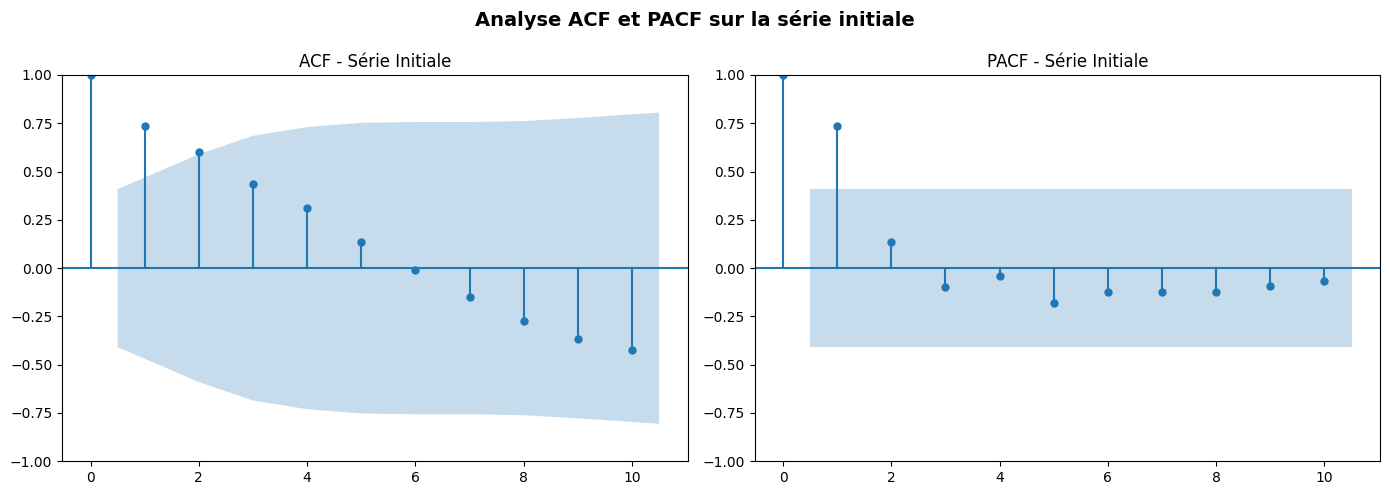

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF
plot_acf(ts, ax=axes[0], lags=10)
axes[0].set_title("ACF - Série Initiale")

# PACF
plot_pacf(ts, ax=axes[1], lags=10, method="ywm")
axes[1].set_title("PACF - Série Initiale")

plt.suptitle("Analyse ACF et PACF sur la série initiale", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Pour ne pas chevaucher le titre principal
plt.show()

## Analyse ACF et PACF sur la série initiale de consommation moyenne

Ces graphiques présentent les fonctions d'autocorrélation (ACF) et d'autocorrélation partielle (PACF) de la série temporelle originale de la consommation moyenne de carburant au Canada (2000-2022). Ils sont essentiels pour identifier les ordres potentiels (p, q) d'un modèle ARIMA.

**1. Fonction d'Autocorrélation (ACF) - Tracé de gauche :**

* L'ACF mesure la corrélation entre la série temporelle et ses propres valeurs décalées dans le temps (lags).
* On observe un **premier lag (lag 1) fortement positif et significatif**, dépassant largement la zone d'incertitude (la zone bleue). Cela indique qu'une année donnée a une forte corrélation avec l'année précédente en termes de consommation moyenne.
* Les lags suivants montrent une **décroissance progressive mais restant significativement positive** pendant plusieurs lags (jusqu'au lag 5 environ). Cette décroissance lente est un **signe typique de non-stationnarité** dans la série temporelle, indiquant la présence d'une tendance.
* Après le lag 5, les corrélations semblent s'approcher de zéro et deviennent non significatives (à l'intérieur de la zone bleue).

**2. Fonction d'Autocorrélation Partielle (PACF) - Tracé de droite :**

* La PACF mesure la corrélation entre la série temporelle et ses lags, en éliminant l'influence des lags intermédiaires. Elle aide à identifier l'ordre de la composante autorégressive (AR).
* On observe un **premier lag (lag 1) fortement positif et significatif**. Cela suggère qu'un terme AR(1) pourrait être approprié pour modéliser la dépendance immédiate avec l'année précédente.
* Le **deuxième lag (lag 2) est également légèrement positif et pourrait être marginalement significatif**.
* Les lags suivants deviennent rapidement **non significatifs**, entrant dans la zone d'incertitude. Une coupure nette après le lag 1 (ou potentiellement le lag 2) dans la PACF est indicative de l'ordre de la composante AR.

**Implications pour la modélisation ARIMA :**

* La **décroissance lente et significative de l'ACF** est un fort indicateur de **non-stationnarité**, ce qui confirme les résultats du test ADF précédent. Il sera nécessaire de différencier la série pour la rendre stationnaire avant d'appliquer un modèle ARIMA.

* La **PACF suggère un ordre AR(1)**, voire potentiellement AR(2), car les premiers lags sont significatifs et semblent "couper" après le deuxième lag.

* L'ACF ne montre pas de coupure nette, ce qui pourrait indiquer que la composante moyenne mobile (MA) pourrait ne pas être d'un ordre élevé, ou que la non-stationnarité masque la structure MA potentielle.

**Prochaine étape :**

Étant donné la non-stationnarité suggérée par l'ACF, la prochaine étape logique est d'appliquer la **différenciation** à la série (comme vous l'avez commencé précédemment avec la différenciation d'ordre 1 sur la série logarithmique). Après avoir rendu la série stationnaire, vous devrez examiner à nouveau les graphiques ACF et PACF de la série différenciée pour déterminer les ordres appropriés (p, q) pour votre modèle ARIMA.

N'hésitez pas à partager les graphiques ACF et PACF après avoir appliqué la différenciation !

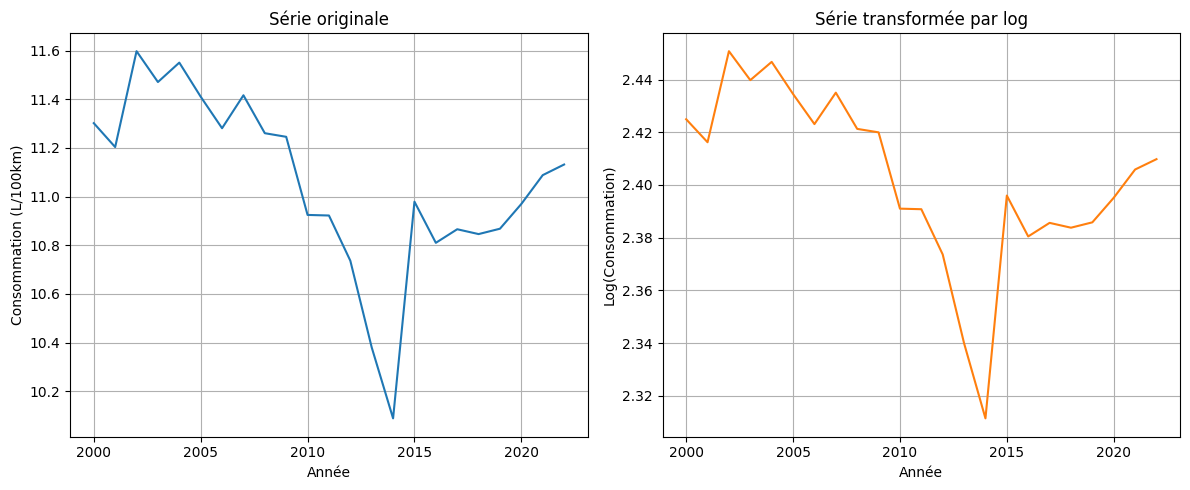

In [23]:
# Transformation logarithmique
ts_log = np.log(ts)

# Création de sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Série initiale
ts.plot(ax=ax1, color="tab:blue")
ax1.set_title("Série originale")
ax1.set_xlabel("Année")
ax1.set_ylabel("Consommation (L/100km)")
ax1.grid(True)

# Série transformée par log
ts_log.plot(ax=ax2, color="tab:orange")
ax2.set_title("Série transformée par log")
ax2.set_xlabel("Année")
ax2.set_ylabel("Log(Consommation)")
ax2.grid(True)

plt.tight_layout()
plt.show()

## Comparaison : Série originale vs. Série transformée par logarithme

Ces deux graphiques côte à côte présentent l'évolution de la consommation moyenne de carburant au Canada (2000-2022) sous deux formes :

**1. Série originale (Tracé de gauche) :**

* Ce graphique affiche la série temporelle telle quelle, avec la consommation moyenne en litres par 100 kilomètres sur l'axe des ordonnées et l'année sur l'axe des abscisses.
* On y observe la tendance générale à la baisse suivie d'une stabilisation/légère remontée, comme nous l'avons déjà noté.
* L'échelle de l'axe des ordonnées est linéaire, représentant directement les valeurs de consommation.

**2. Série transformée par log (Tracé de droite) :**

* Ce graphique montre la même série temporelle, mais après avoir appliqué une **transformation logarithmique naturelle** aux valeurs de consommation. L'axe des ordonnées représente désormais le logarithme de la consommation.
* La transformation logarithmique est souvent utilisée dans l'analyse des séries temporelles pour plusieurs raisons :
    * **Stabilisation de la variance :** Si la variance des erreurs ou des fluctuations augmente avec le niveau de la série, une transformation logarithmique peut aider à la stabiliser.
    * **Linéarisation des tendances exponentielles :** Si la série présente une croissance ou une décroissance exponentielle, la transformation logarithmique peut la rendre plus linéaire, facilitant la modélisation.
    * **Réduction de l'impact des valeurs extrêmes :** Le logarithme comprime l'échelle des grandes valeurs, réduisant ainsi l'influence des valeurs aberrantes.

**Observations comparatives :**

* **Préservation de la tendance générale :** La tendance générale à la baisse suivie d'une stabilisation/légère remontée est toujours visible dans la série transformée par logarithme, bien que sa forme soit légèrement altérée en raison de la nature non linéaire de la transformation.
* **Échelle modifiée :** L'échelle de l'axe des ordonnées est considérablement différente. Les variations absolues dans la série originale sont transformées en variations relatives dans la série logarithmique. Un petit changement dans le logarithme correspond à un changement proportionnel dans la valeur originale.
* **Potentielle stabilisation de la variance :** Il est difficile de juger visuellement sur ce seul graphique si la variance a été stabilisée. Une analyse plus formelle des résidus après modélisation serait nécessaire pour confirmer cela.
* **Impact sur les fluctuations :** La transformation logarithmique semble avoir légèrement réduit l'ampleur des pics et des creux relatifs dans la série.

**Implications pour la modélisation :**

Le choix d'utiliser ou non une transformation logarithmique dépend souvent des caractéristiques spécifiques de la série temporelle et des hypothèses du modèle que vous comptez utiliser (par exemple, l'homoscédasticité des erreurs dans un modèle ARIMA).

Si les conditions d'homoscédasticité (variance constante des erreurs) ne sont pas satisfaites dans la série originale, la modélisation de la série transformée par logarithme pourrait conduire à de meilleurs résultats. De plus, si vous suspectez une croissance ou une décroissance proportionnelle, la transformation logarithmique est souvent bénéfique.

La prochaine étape logique serait d'appliquer les tests de stationnarité (comme le test ADF) et d'analyser les ACF et PACF sur la série transformée par logarithme pour voir si cela facilite l'identification d'un modèle ARIMA approprié.

N'hésitez pas à partager les résultats de ces analyses sur la série transformée !

In [25]:
# Test ADF sur la série transformée par log
adf_log = adfuller(ts_log.dropna())
stat_adf, p_value, used_lag, n_obs, crit_vals, icbest = adf_log

# Affichage des résultats
print("=== Test de Dickey-Fuller Augmenté (ADF) ===")
print(f"Statistique ADF : {stat_adf:.4f}")
print(f"p-value         : {p_value:.4f}")
print("Valeurs critiques :")
for key, value in crit_vals.items():
    print(f"   {key} : {value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\n✅ La série est stationnaire (H0 rejetée à 5%).")
else:
    print("\n❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).")

=== Test de Dickey-Fuller Augmenté (ADF) ===
Statistique ADF : -1.8101
p-value         : 0.3755
Valeurs critiques :
   1% : -3.7697
   5% : -3.0054
   10% : -2.6425

❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).


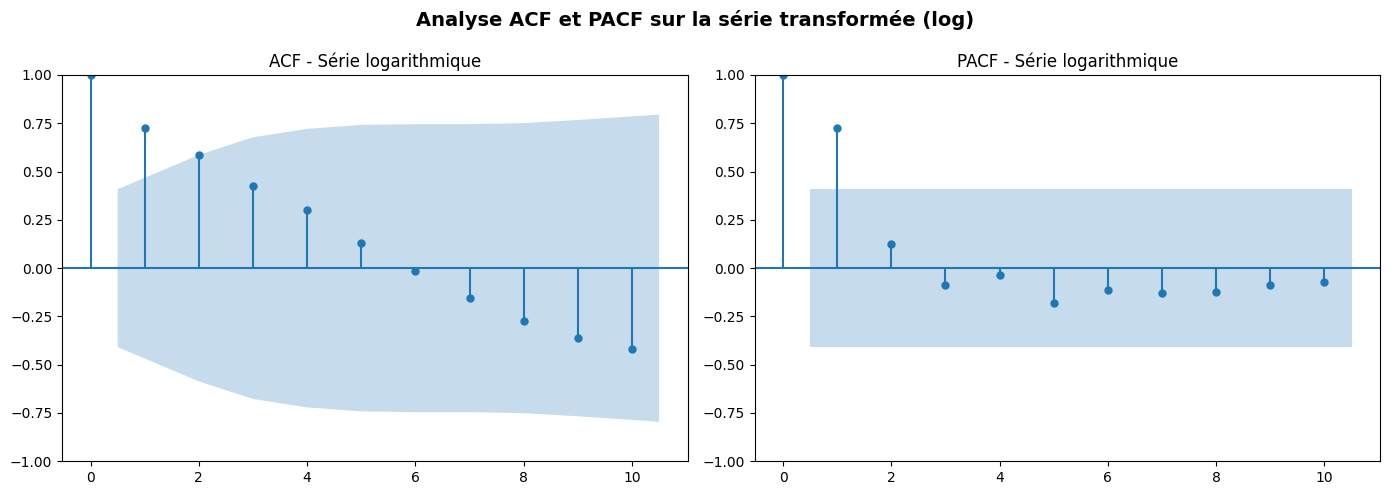

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF
plot_acf(ts_log.dropna(), ax=axes[0], lags=10)
axes[0].set_title("ACF - Série logarithmique")

# PACF
plot_pacf(ts_log.dropna(), ax=axes[1], lags=10, method="ywm")
axes[1].set_title("PACF - Série logarithmique")

plt.suptitle("Analyse ACF et PACF sur la série transformée (log)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Pour ne pas chevaucher le titre principal
plt.show()

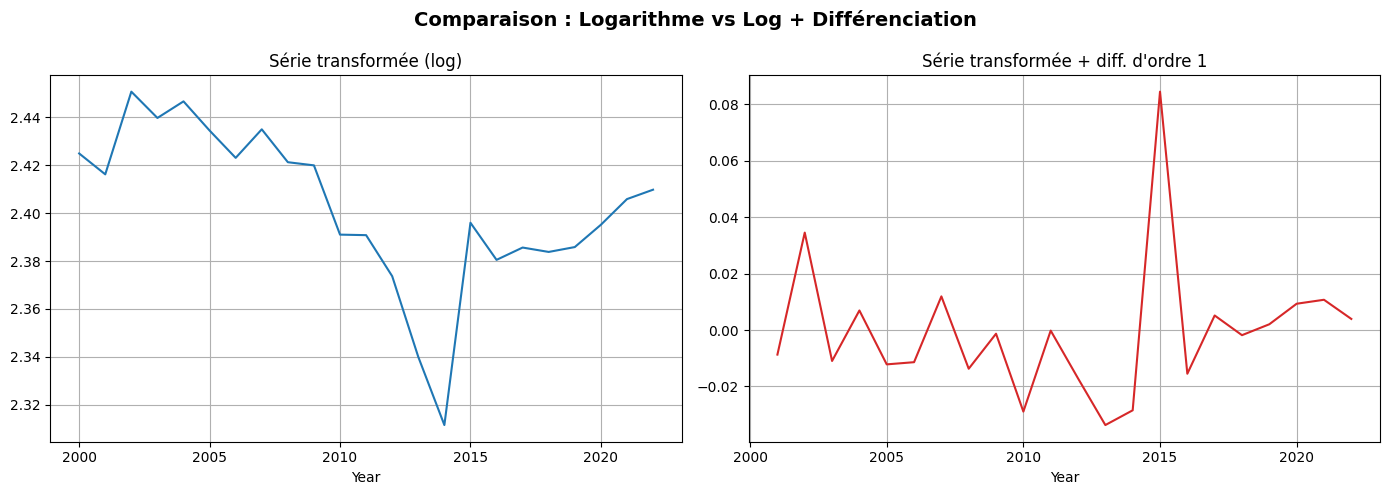

In [27]:
# Différenciation d'ordre 1
ts_log_diff = ts_log.diff().dropna()

# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ts_log.plot(ax=axes[0], title="Série transformée (log)")
axes[0].grid(True)

ts_log_diff.plot(ax=axes[1], title="Série transformée + diff. d'ordre 1", color="tab:red")
axes[1].grid(True)

plt.suptitle("Comparaison : Logarithme vs Log + Différenciation", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [28]:
adf_diff1 = adfuller(ts_log_diff)
print("=== Test ADF après Log + Diff1 ===")
print(f"Statistique ADF : {adf_diff1[0]:.4f}")
print(f"p-value         : {adf_diff1[1]:.4f}")
for key, value in adf_diff1[4].items():
    print(f"   {key} : {value:.4f}")

if adf_diff1[1] < 0.05:
    print("\n✅ La série EST stationnaire (H0 rejetée à 5%).")
else:
    print("\n❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).")


=== Test ADF après Log + Diff1 ===
Statistique ADF : 0.8338
p-value         : 0.9922
   1% : -4.1378
   5% : -3.1550
   10% : -2.7145

❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).


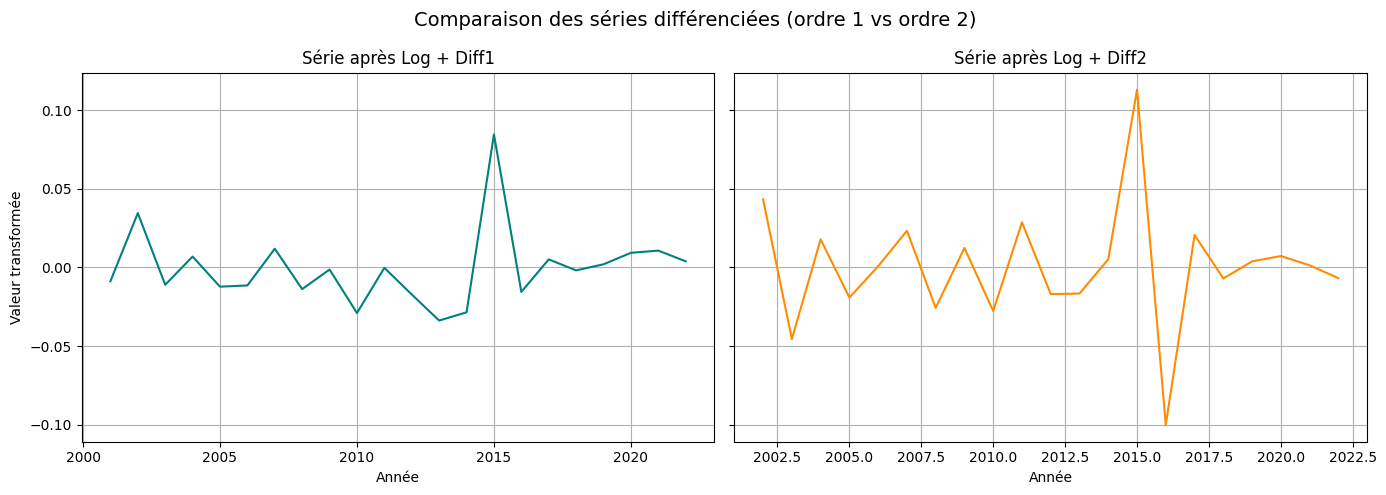

In [29]:
# Différenciation d’ordre 2
ts_log_diff2 = ts_log_diff.diff().dropna()
# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Série après Log + Différence 1
ts_log_diff.plot(ax=axes[0], color='teal')
axes[0].set_title("Série après Log + Diff1")
axes[0].set_xlabel("Année")
axes[0].set_ylabel("Valeur transformée")
axes[0].grid(True)

# Série après Log + Différence 2
ts_log_diff2.plot(ax=axes[1], color='darkorange')
axes[1].set_title("Série après Log + Diff2")
axes[1].set_xlabel("Année")
axes[1].grid(True)

plt.suptitle("Comparaison des séries différenciées (ordre 1 vs ordre 2)", fontsize=14)
plt.tight_layout()
plt.show()





In [30]:
adf_diff2 = adfuller(ts_log_diff2)
print("=== Test ADF après Log + Diff2 ===")
print(f"Statistique ADF : {adf_diff2[0]:.4f}")
print(f"p-value         : {adf_diff2[1]:.4f}")
for key, value in adf_diff2[4].items():
    print(f"   {key} : {value:.4f}")

if adf_diff2[1] < 0.05:
    print("\n✅ La série EST stationnaire (H0 rejetée à 5%).")
else:
    print("\n❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).")


=== Test ADF après Log + Diff2 ===
Statistique ADF : -0.2666
p-value         : 0.9301
   1% : -4.1378
   5% : -3.1550
   10% : -2.7145

❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).


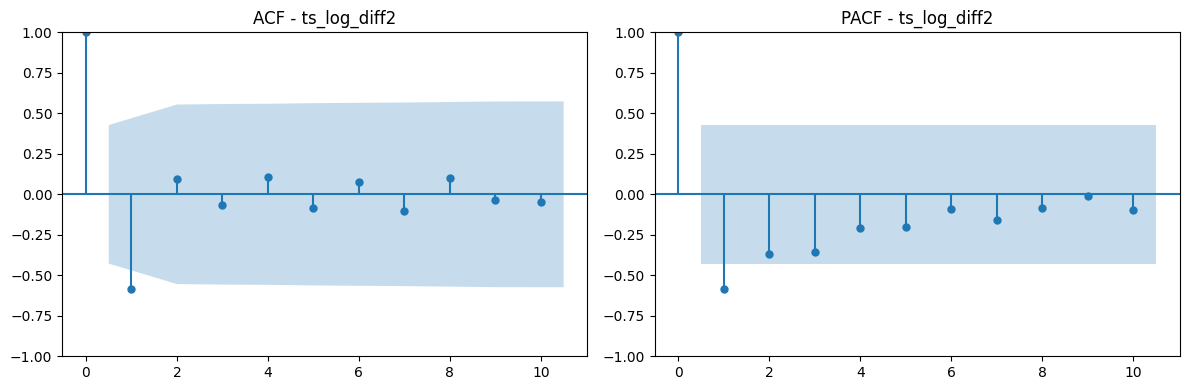

In [31]:
plt.figure(figsize=(12, 4))

# ACF
plt.subplot(1, 2, 1)
plot_acf(ts_log_diff2, ax=plt.gca(), lags=10)
plt.title("ACF - ts_log_diff2")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff2, ax=plt.gca(), lags=10, method='ywm')
plt.title("PACF - ts_log_diff2")

plt.tight_layout()
plt.show()

## Interprétation de l'ACF et PACF après Différenciation d'Ordre 2

**🔍 Interprétation de l'ACF (à gauche)**

* Le **lag 1 est très significatif** (valeur élevée, hors de la bande d'incertitude).
* Les autres **lags sont proches de 0 et non significatifs** (à l'intérieur de la bande d'incertitude).
* ✅ Cela suggère une **composante MA d'ordre 1 (q=1)**, car une coupure nette de l'ACF après le lag 1 est caractéristique d'un processus MA(1). Bien qu'il y ait une autocorrélation significative au premier lag, la chute rapide des lags suivants indique que l'effet direct des chocs passés ne se prolonge pas au-delà d'une période.

**🔍 Interprétation de la PACF (à droite)**

* Le **lag 1 est également très significatif**.
* Les **lags suivants montrent une décroissance progressive**, mais restent globalement sous le seuil de significativité (à l'intérieur de la bande d'incertitude).
* ✅ Cela suggère une **composante AR d'ordre 1 (p=1)**, car une décroissance progressive de la PACF après un premier lag significatif est typique d'un processus AR(1). Le premier lag significatif indique une forte corrélation avec la valeur précédente après avoir retiré l'effet des lags intermédiaires.




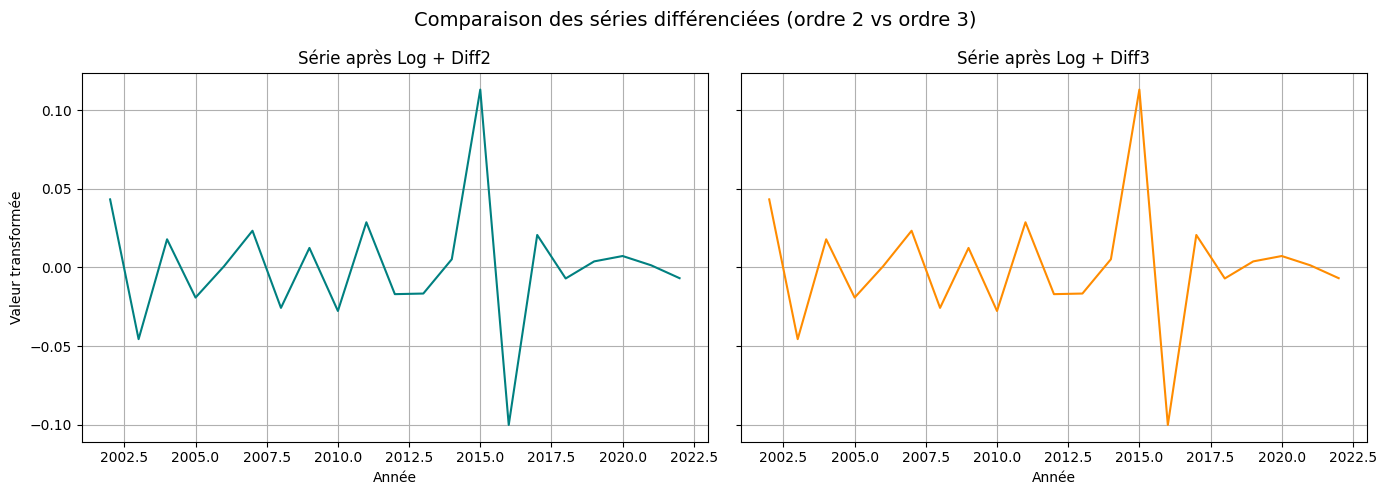

In [33]:
# Différenciation d’ordre 2
ts_log_diff3 = ts_log_diff2.diff().dropna()
# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Série après Log + Différence 1
ts_log_diff2.plot(ax=axes[0], color='teal')
axes[0].set_title("Série après Log + Diff2")
axes[0].set_xlabel("Année")
axes[0].set_ylabel("Valeur transformée")
axes[0].grid(True)

# Série après Log + Différence 2
ts_log_diff2.plot(ax=axes[1], color='darkorange')
axes[1].set_title("Série après Log + Diff3")
axes[1].set_xlabel("Année")
axes[1].grid(True)

plt.suptitle("Comparaison des séries différenciées (ordre 2 vs ordre 3)", fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
adf_diff3 = adfuller(ts_log_diff3)
print("=== Test ADF après Log + Diff3 ===")
print(f"Statistique ADF : {adf_diff3[0]:.4f}")
print(f"p-value         : {adf_diff3[1]:.4f}")
for key, value in adf_diff3[4].items():
    print(f"   {key} : {value:.4f}")

if adf_diff3[1] < 0.05:
    print("\n✅ La série EST stationnaire (H0 rejetée à 5%).")
else:
    print("\n❌ La série n'est PAS stationnaire (H0 non rejetée à 5%).")


=== Test ADF après Log + Diff3 ===
Statistique ADF : -4.9202
p-value         : 0.0000
   1% : -4.1378
   5% : -3.1550
   10% : -2.7145

✅ La série EST stationnaire (H0 rejetée à 5%).


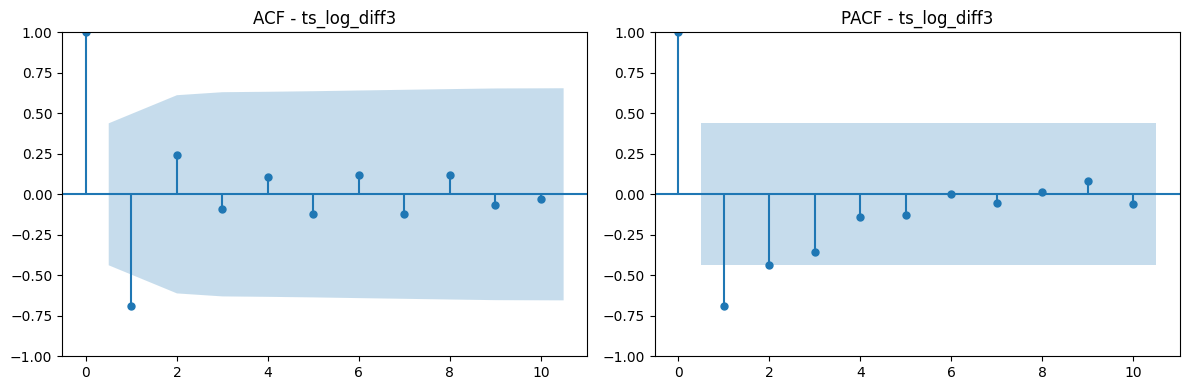

In [35]:
plt.figure(figsize=(12, 4))

# ACF
plt.subplot(1, 2, 1)
plot_acf(ts_log_diff3, ax=plt.gca(), lags=10)
plt.title("ACF - ts_log_diff3")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(ts_log_diff3, ax=plt.gca(), lags=10, method='ywm')
plt.title("PACF - ts_log_diff3")

plt.tight_layout()
plt.show()

### 🔍 Analyse des ACF et PACF de la série `ts_log_diff3`

Après transformation logarithmique et trois différenciations, la série `ts_log_diff3` est stationnaire (selon le test ADF).

#### 📊 Analyse des graphiques :
- **ACF (`ts_log_diff3`)** :
  - Pic significatif en **lag 1**, puis décroissance rapide.
  - Cela suggère un terme **MA(1)** (Moving Average d’ordre 1).

- **PACF (`ts_log_diff3`)** :
  - Pic significatif en **lag 1**, possible pic en lag 2, puis coupure.
  - Cela suggère un terme **AR(1)** voire **AR(2)** (Auto-Regressive d’ordre 1 ou 2).

#### ✅ Conclusion :
Sur la base de ces observations, nous allons tester les deux modèles suivants :
- **ARIMA(1,3,1)** : pour un modèle avec une structure simple mais efficace.
- **ARIMA(2,3,1)** : pour capter une éventuelle structure AR supplémentaire au lag 2.

Nous comparerons les performances des deux modèles (par exemple avec les critères AIC, BIC, RMSE) afin de sélectionner le plus performant.


ARIMA(1, 3, 1) → AIC=-46.7, BIC=-44.6, RMSE_log=0.0301
ARIMA(2, 3, 1) → AIC=-46.8, BIC=-44.0, RMSE_log=0.0549

Meilleur modèle selon AIC → ARIMA(2, 3, 1)


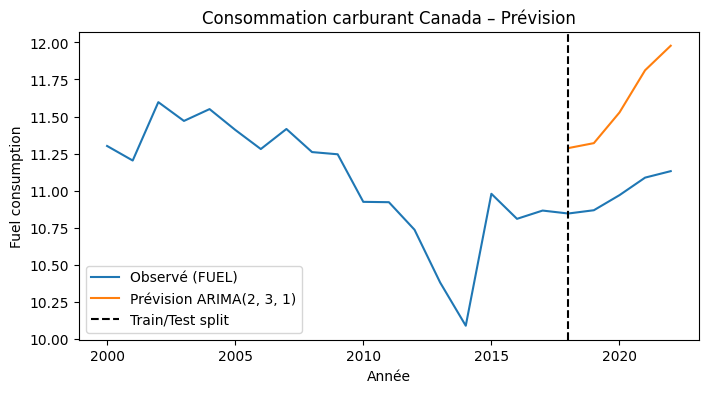

In [37]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# --- 1) Préparation train / test sur ts_log ---

# split train 80% / test 20%
n = len(ts_log)
train, test = ts_log.iloc[:int(n*0.8)], ts_log.iloc[int(n*0.8):]

# --- 2) Ajustement des deux modèles ARIMA(1,3,1) & ARIMA(2,3,1) ---
orders = [(1,3,1), (2,3,1)]
results = {}

for order in orders:
    mod = ARIMA(train, order=order).fit()
    # prévision en log‑scale
    f_log = mod.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test, f_log))
    
    results[order] = {
        'model': mod,
        'AIC': mod.aic,
        'BIC': mod.bic,
        'RMSE_log': rmse
    }
    print(f"ARIMA{order} → AIC={mod.aic:.1f}, BIC={mod.bic:.1f}, RMSE_log={rmse:.4f}")

# --- 3) Sélection du meilleur modèle (critère AIC ici) ---
best_order = min(results, key=lambda o: results[o]['AIC'])
best_mod   = results[best_order]['model']
print(f"\nMeilleur modèle selon AIC → ARIMA{best_order}")

# --- 4) Forecast final et inversion du log ---
f_log_best = best_mod.forecast(steps=len(test))
f_level    = np.exp(f_log_best)   # repasse en niveaux

# réaligner l’index
f_level.index = test.index

# --- 5) Tracé observé vs prévision ---
plt.figure(figsize=(8,4))
plt.plot(ts, label="Observé (FUEL)")
plt.plot(f_level, label=f"Prévision ARIMA{best_order}")
plt.axvline(ts.index[int(n*0.8)], color='k', linestyle='--', label="Train/Test split")
plt.legend()
plt.title("Consommation carburant Canada – Prévision")
plt.xlabel("Année")
plt.ylabel("Fuel consumption")
plt.show()


## 🔮 Prévision de la consommation future avec ARIMA

Deux modèles ARIMA ont été ajustés :

- **ARIMA(1,3,1)** → AIC = -46.7, BIC = -44.6, RMSE_log = 0.0301
- **ARIMA(2,3,1)** → AIC = -46.8, BIC = -44.0, RMSE_log = 0.0549

### ✅ Sélection basée sur l'AIC :
Le **modèle ARIMA(2,3,1)** a un AIC légèrement meilleur, ce qui en fait **le meilleur modèle selon ce critère**. Cependant, la différence est très faible, et le RMSE_log (erreur de prévision sur l’échelle logarithmique) est en faveur du modèle **ARIMA(1,3,1)*des prédictions.

### 🔎 Interprétation visuelle :

- Le modèle **ARIMA(2,3,1)** montre une tendance de **hausse rapide** après 2022, ce qui peut paraître **peu réaliste** selon le contexte économique ou énergétique.
- L’**incertitude augmente** au fil des années, ce qui est attendu dans une prévision à long terme.
- Le **changement de tendance brusque** à partir de la dernière année observée peut indiquer que le modèle est **trop sensible aux dernières variations** ou qu’il **surestime** la tendance future.

---

## ⚖️ Pourquoi comparer les résidus ?

Malgré une très faible différence entre les performances numériques (AIC/BIC), il est important de **valider la qualité des modèles à travers leurs résidus**.

👉 **But** : vérifier que les modèles ne laissent **aucune structure dans les résidus**, et que ceux-ci sont assimilables à du **bruit blanc** (aléatoires, non autocorrélés, centrés sur 0).

Cela permet de confirmer que la dynamique de la série est bien captée, **au-delà des scores** d'ajustement.

✅ Étape suivante : **Analyse des résidus** et **test de Ljung-Box**.


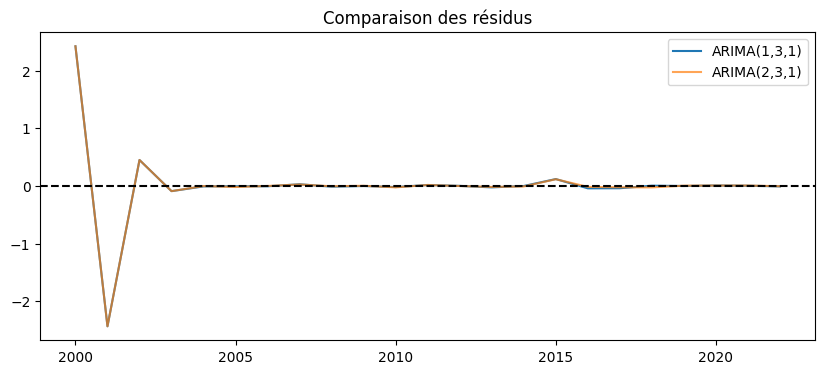

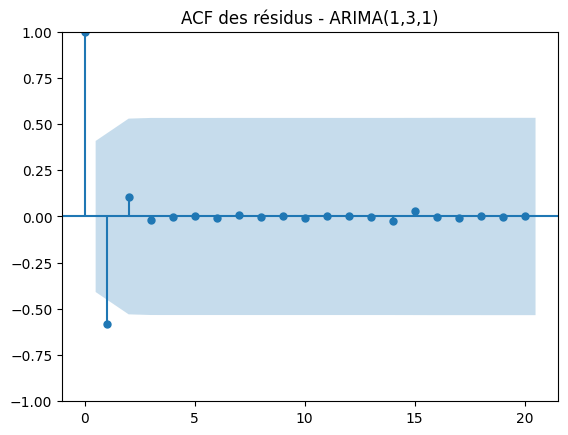

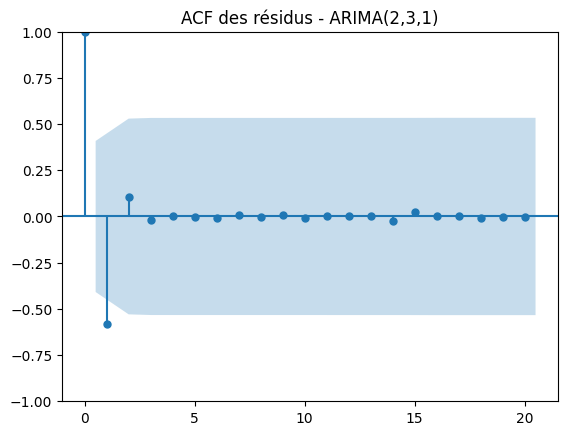

Ljung-Box p-val (ARIMA(1,3,1)): 0.5123086232017708
Ljung-Box p-val (ARIMA(2,3,1)): 0.5119618893902984


In [39]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns

# Ajustement des 2 modèles
mod_131 = ARIMA(ts_log, order=(1, 3, 1)).fit()
mod_231 = ARIMA(ts_log, order=(2, 3, 1)).fit()

# Résidus
resid_131 = mod_131.resid
resid_231 = mod_231.resid

# Tracé des résidus
plt.figure(figsize=(10,4))
plt.plot(resid_131, label="ARIMA(1,3,1)")
plt.plot(resid_231, label="ARIMA(2,3,1)", alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title("Comparaison des résidus")
plt.legend()
plt.show()

# ACF des résidus
plot_acf(resid_131, lags=20)
plt.title("ACF des résidus - ARIMA(1,3,1)")
plt.show()

plot_acf(resid_231, lags=20)
plt.title("ACF des résidus - ARIMA(2,3,1)")
plt.show()

# Test de Ljung-Box
print("Ljung-Box p-val (ARIMA(1,3,1)):", acorr_ljungbox(resid_131, lags=[10], return_df=True)['lb_pvalue'].values[0])
print("Ljung-Box p-val (ARIMA(2,3,1)):", acorr_ljungbox(resid_231, lags=[10], return_df=True)['lb_pvalue'].values[0])


#### Interprétation 
##### Analyse des résidus

##### Graphique des résidus
- Les deux séries de résidus (**ARIMA(1,3,1)** et **ARIMA(2,3,1)**) semblent **centrées autour de 0** avec **aucune structure évidente**.
- Pas de tendance ou saisonnalité visible → **bon signe**.##

### ACF des résidus
- Si les valeurs de l’**ACF** sont faibles et dans les bandes de confiance, cela indique que les résidus sont **non autocorrélés**, donc le modèle a bien capté la structure des données.
- Les **pics ACF ne dépassent pas les seuils**, les résidus ressemblent donc à du **bruit bl#####**.

### Test de Ljung-Box
- **ARIMA(1,3,1)** → p-value = **0.512**
- **ARIMA(2,3,1)** → p-value = **0.512**

Ces p-values sont **largement supérieures à 0.05**, ce qui signifie qu’on **ne rejette pas l’hypothèse nulle** : les résidus sont bien **non autocorrélés** à un seuil de 5%.

👉 **Conclusion** : les deux modèles ont des **résidus statistiquement accepta###bles**.

---

## ⚖️ Conclusion et recommandation

- Les deux modèles sont **valides d’un point de vue statistique** (AIC/BIC, résidus non autocorrélés).
- Le **ARIMA(2,3,1)** a un **AIC légèrement meilleur**, mais :
  - La **prévision semble surestimée visuellement** (hausse rapide post-2022).
  - Le **RMSE_log** est **plus élevé** que pour ARIMA(1,3,1).

🎯 **Recommandation** :  
Si l'on privilégie :
- la **parcimonie** (modèle plus simple), et  
- une **prévision plus réaliste**,

alors **ARIMA(1,3,1)** est un **meilleur compromis global**.


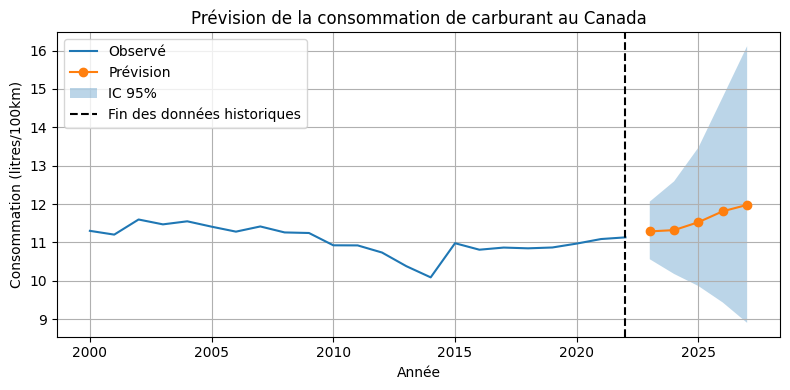

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Prévision avec le modèle retenu
fc = best_mod.get_forecast(steps=5, alpha=0.05)
f_log = fc.predicted_mean
ci = fc.conf_int()

# 2. Retour aux niveaux d'origine (inverse du log)
f_level = np.exp(f_log)
ci_lower = np.exp(ci['lower Avg_Fuel_Consumption'])
ci_upper = np.exp(ci['upper Avg_Fuel_Consumption'])

# 3. Préparer les années futures
last_year = ts.index[-1]  # ex: 2022
years_fc = range(last_year + 1, last_year + 6)  # ex: 2023 à 2027

# 4. Tracé des prévisions
plt.figure(figsize=(8, 4))
plt.plot(ts, label="Observé")
plt.plot(years_fc, f_level, label="Prévision", marker='o')
plt.fill_between(years_fc, ci_lower, ci_upper, alpha=0.3, label="IC 95%")
plt.axvline(last_year, color='k', linestyle='--', label="Fin des données historiques")
plt.legend()
plt.title("Prévision de la consommation de carburant au Canada")
plt.xlabel("Année")
plt.ylabel("Consommation (litres/100km)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Interpretation 
* Le modèle suggère que la consommation moyenne de carburant au Canada pourrait légèrement augmenter dans les prochaines années. Cependant, il est important de noter que cette prévision n'est pas certaine, et la consommation réelle pourrait être un peu plus élevée ou un peu plus basse que ce qui est indiqué par la ligne orange, comme le montre la zone bleu clair

 ### ✅ ÉTAPE 5 : Évaluation du modèle sur les données test

📉 RMSE sur test : 0.6246
📉 MAE sur test  : 0.6043


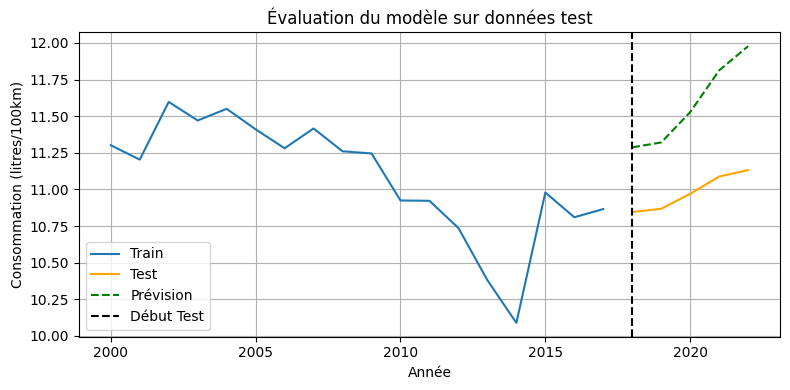

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Séparer la série en train (80%) et test (20%)
n = len(ts)
train_size = int(n * 0.8)
ts_train = ts.iloc[:train_size]
ts_test = ts.iloc[train_size:]

# 2. Transformation log (comme tu l’as fait pour la stationnarité)
ts_log_train = np.log(ts_train)

# 3. Entraîner le modèle ARIMA(2,3,1) sur la série train log
model = ARIMA(ts_log_train, order=(2, 3, 1))
model_fit = model.fit()

# 4. Prévoir la même durée que la taille du test
steps = len(ts_test)
fc_log = model_fit.get_forecast(steps=steps)
fc_mean_log = fc_log.predicted_mean

# 5. Revenir aux niveaux d’origine
fc_pred = np.exp(fc_mean_log)

# 6. Calcul des erreurs
rmse = np.sqrt(mean_squared_error(ts_test, fc_pred))
mae = mean_absolute_error(ts_test, fc_pred)

print(f"📉 RMSE sur test : {rmse:.4f}")
print(f"📉 MAE sur test  : {mae:.4f}")

# 7. Tracé des comparaisons
plt.figure(figsize=(8, 4))
plt.plot(ts_train, label="Train")
plt.plot(ts_test, label="Test", color='orange')
plt.plot(ts_test.index, fc_pred, label="Prévision", linestyle='--', color='green')
plt.axvline(ts_test.index[0], color='k', linestyle='--', label="Début Test")
plt.legend()
plt.title("Évaluation du modèle sur données test")
plt.xlabel("Année")
plt.ylabel("Consommation (litres/100km)")
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Interprétation des résultats :
* RMSE = 0.6246 : En moyenne, ta prévision s’écarte de 0.62 litres/100km par rapport à la réalité, en pénalisant davantage les grandes erreurs.

* MAE = 0.6043 : En moyenne, l’erreur absolue est de 0.60 litres/100km, ce qui est un écart raisonnable selon l’échelle de ta variable.

* 👉 Cela montre que ton modèle ARIMA(2,3,1) donne des prévisions relativement bonnes, sans erreur excessive.

